## Load Required Libraries

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [67]:
df = pd.read_csv('housing_dataset.csv')
df

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West


## Data Preprocessing

In [68]:
df = df.drop(['Home','Brick'], axis=1)
df

,Price,SqFt,Bedrooms,Bathrooms,Offers,Neighborhood
0,114300,1790,2,2,2,East
1,114200,2030,4,2,3,East
2,114800,1740,3,2,1,East
3,94700,1980,3,2,3,East
4,119800,2130,3,3,3,East
...,...,...,...,...,...,...
123,119700,1900,3,3,3,East
124,147900,2160,4,3,3,East
125,113500,2070,2,2,2,North
126,149900,2020,3,3,1,West


In [69]:
#Clean Data
df.isnull().sum()

Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Neighborhood    0
dtype: int64

## Exploratory Data Analysis

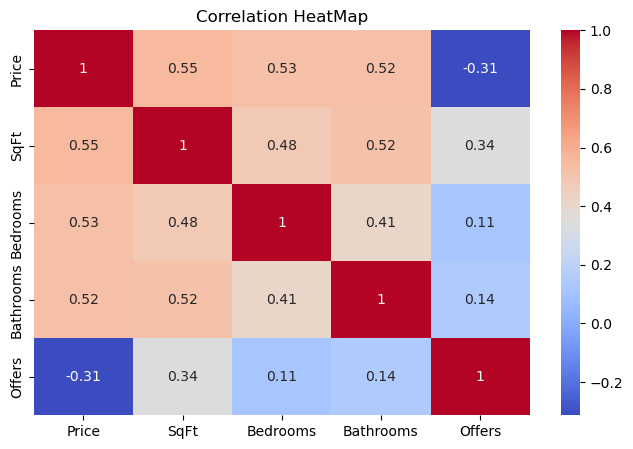

In [70]:
# Check Correlation betwwen Attributes
corr = df.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("Correlation HeatMap")
plt.show()

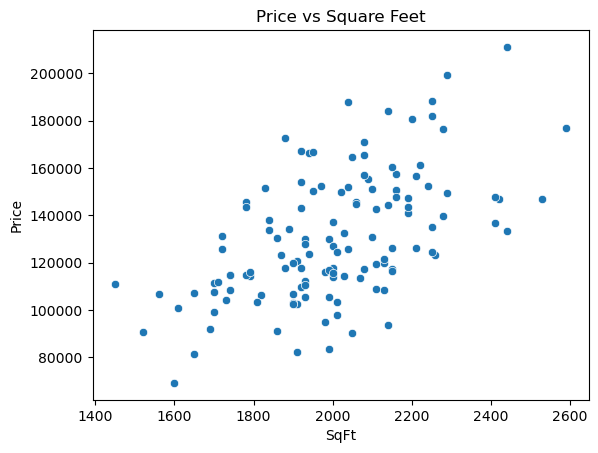

In [71]:
# Square Feet VS Price
sns.scatterplot(x='SqFt', y='Price', data=df)
plt.title('Price vs Square Feet')
plt.show()


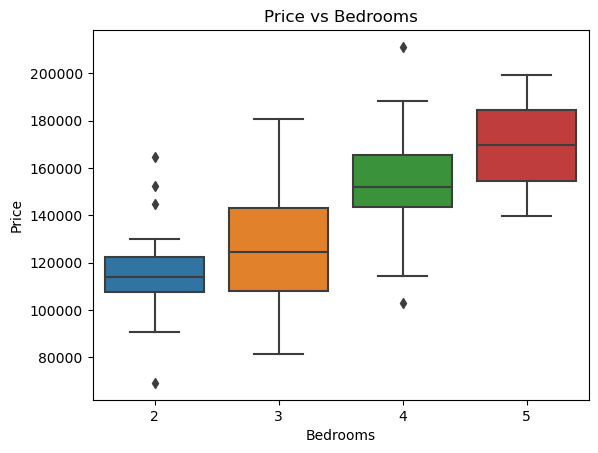

In [72]:
#Price vs Bedrooms
sns.boxplot(x='Bedrooms', y='Price', data=df)
plt.title('Price vs Bedrooms')
plt.show()

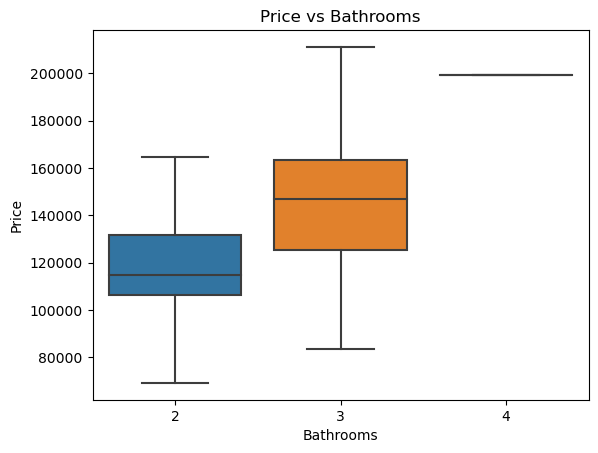

In [73]:
sns.boxplot(x='Bathrooms', y='Price', data=df)
plt.title('Price vs Bathrooms')
plt.show()

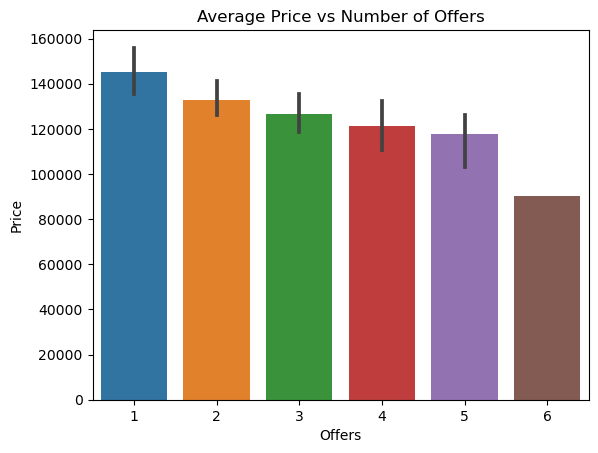

In [74]:
sns.barplot(x='Offers', y='Price', data=df)
plt.title('Average Price vs Number of Offers')
plt.show()

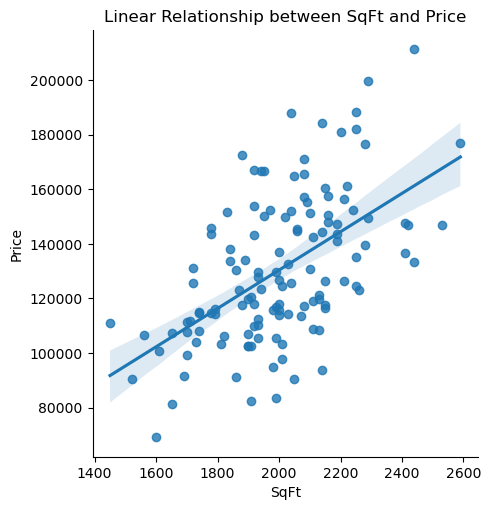

In [75]:
sns.lmplot(x='SqFt', y='Price', data=df)
plt.title('Linear Relationship between SqFt and Price')
plt.show()


C:\Users\jayes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

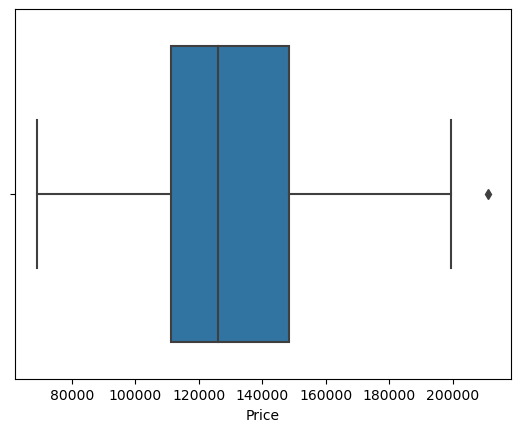

In [76]:
sns.boxplot(df['Price'])

In [77]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Price'] > Q1 - 1.5*IQR) & (df['Price'] < Q3 + 1.5*IQR)]


C:\Users\jayes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

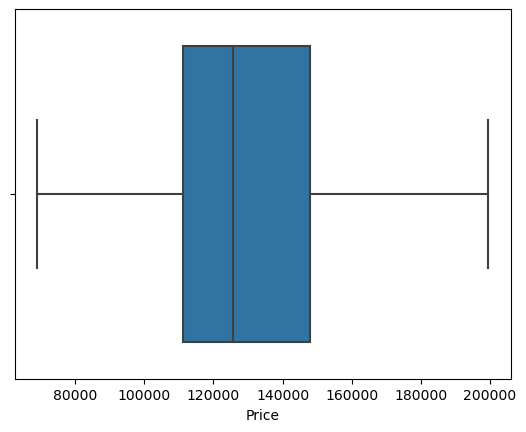

In [78]:
sns.boxplot(df['Price'])

## Lable Encoding

In [110]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Neighborhood'] = le.fit_transform(df['Neighborhood'])
df

C:\Users\jayes\AppData\Local\Temp\ipykernel_7208\1370824839.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Neighborhood'] = le.fit_transform(df['Neighborhood'])


,Price,SqFt,Bedrooms,Bathrooms,Offers,Neighborhood
0,114300,1790,2,2,2,0
1,114200,2030,4,2,3,0
2,114800,1740,3,2,1,0
3,94700,1980,3,2,3,0
4,119800,2130,3,3,3,0
...,...,...,...,...,...,...
123,119700,1900,3,3,3,0
124,147900,2160,4,3,3,0
125,113500,2070,2,2,2,1
126,149900,2020,3,3,1,2


In [81]:
x = df.drop(['Price'], axis=1)
y = df['Price']

## Train The Model

In [89]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)

In [90]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [91]:
y_pred = model.predict(x_test)
y_pred

array([136108.78520447, 109560.57839768, 119812.31501301, 117122.19377442,
       128624.025468  , 125626.1007394 , 134879.5561541 , 119558.63592432,
       151915.72253432, 167049.38630174,  99111.15230605, 147109.26086086,
       208951.67759121,  94636.61552321,  94570.19289687, 157051.3287751 ,
       120660.64093331, 154714.47350444, 146596.99676029, 155393.4623987 ,
       131898.36052426, 141300.28693711, 115072.18184535, 122120.81783341,
       127638.04249239, 140815.65999869])

## Model Evaluation

In [92]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))
print("Root Mean Square Error: ", np.sqrt(mean_squared_error(y_test,y_pred)))
print("Mean Absolute Error: ", mean_absolute_error(y_test,y_pred))

Mean Squared Error: 179430018.90281442
R-squared: 0.7469950060546504
Root Mean Square Error:  13395.14908102237
Mean Absolute Error:  12113.779551818694


In [97]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=300)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


In [98]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))
print("Root Mean Square Error: ", np.sqrt(mean_squared_error(y_test,y_pred)))
print("Mean Absolute Error: ", mean_absolute_error(y_test,y_pred))

Mean Squared Error: 171131575.84604785
R-squared: 0.7586962116175291
Root Mean Square Error:  13081.72679144645
Mean Absolute Error:  10676.809920634925


## Grid Search Hyperparameter tunning 

In [99]:
# 2. PARAMETER GRID
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],   # trees
    'max_depth': [None, 10, 20, 30],   # depth of trees
    'min_samples_split': [2, 5, 10],   # split min samples
    'min_samples_leaf': [1, 2, 4],     # minimum leaf size
    'max_features': ['auto', 'sqrt']   # features per split
}

In [100]:
# 3. GRID SEARCH
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(n_estimators=300), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=2)

In [101]:
# 4. BEST MODEL
best_model = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score (R2):", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best CV Score (R2): 0.7063061525321814


In [102]:
y_pred = best_model.predict(x_test)

In [103]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))
print("Root Mean Square Error: ", np.sqrt(mean_squared_error(y_test,y_pred)))
print("Mean Absolute Error: ", mean_absolute_error(y_test,y_pred))

Mean Squared Error: 147983628.87491095
R-squared: 0.7913359349987761
Root Mean Square Error:  12164.852192892067
Mean Absolute Error:  9424.142583413344


In [104]:
print('Accuracy of the model is: ', best_model.score(x_test,y_test)*100)

Accuracy of the model is:  79.1335934998776


## Save Model as Pickel File 

In [105]:
import pickle
filname = 'House_Prediction.sav'
pickle.dump(best_model, open(filname,'wb'))

In [106]:
x_test.head()

,SqFt,Bedrooms,Bathrooms,Offers,Neighborhood
67,2040,4,3,3,0
111,1740,2,2,2,1
109,2110,3,2,3,0
39,1740,3,2,2,1
6,1830,3,3,3,2


In [107]:
load_model = pickle.load(open(filname, 'rb'))

In [111]:
load_model.predict([[2250,3,3,4,1]])

C:\Users\jayes\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([127253.44108114])